# 1. Data pre-processing - Understand the data and treat missing values, outliers

In [1]:
%matplotlib inline 
import numpy as np   
from sklearn.model_selection import train_test_split
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# reading the excel file into pandas dataframe
loan_df = pd.read_excel('Bank_Personal_Loan_Modelling-1.xlsx')

In [3]:
loan_df.head()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                       5000 non-null int64
Age (in years)           5000 non-null int64
Experience (in years)    5000 non-null int64
Income (in K/month)      5000 non-null int64
ZIP Code                 5000 non-null int64
Family members           4982 non-null float64
CCAvg                    5000 non-null float64
Education                5000 non-null int64
Mortgage                 5000 non-null int64
Personal Loan            5000 non-null int64
Securities Account       5000 non-null int64
CD Account               5000 non-null int64
Online                   5000 non-null int64
CreditCard               5000 non-null int64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [5]:
# By above info details Family Members is having 4982 non null values.
loan_df[loan_df['Family members'].isnull() == True] 

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
20,21,56,31,25,94015,NaN,0.9,2,111,0,0,0,1,0
58,59,28,2,93,94065,NaN,0.2,1,0,0,0,0,0,0
98,99,49,23,94,92374,NaN,0.3,1,0,0,0,0,1,0
161,162,61,35,80,95053,NaN,2.8,1,0,0,0,0,1,0
235,236,38,8,71,94720,NaN,1.8,3,0,0,0,0,1,0
289,290,42,15,24,92121,NaN,1.0,2,0,0,0,0,1,1
487,488,39,13,88,94117,NaN,1.4,2,0,0,0,0,1,1
721,722,49,24,39,92717,NaN,1.4,3,0,0,0,0,1,0
1460,1461,40,16,85,92677,NaN,0.2,3,0,0,0,0,1,1
1461,1462,54,28,48,93022,NaN,0.2,1,0,0,0,0,1,0


In [6]:
# there are 18 rows 
loan_df = loan_df.apply(lambda x: x.fillna('1'),axis=0)
loan_df[loan_df['Family members'].isnull() == True] 

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [7]:
# converting the Family Member column from object type to int
loan_df.dtypes
loan_df['Family members'] = loan_df['Family members'].astype('int64')

In [8]:
# Removing outliers and assigning it to new dataframe

Q1 = loan_df.quantile(0.25)
Q3 = loan_df.quantile(0.75)
IQR = Q3 - Q1

loan_df_new = loan_df[~((loan_df < (Q1 - 1.5 * IQR)) |(loan_df > (Q3 + 1.5 * IQR))).any(axis=1)]
loan_df_new.groupby(["Personal Loan"]).count()

# we can't use this because it is removing all the rows of personal loan with 1 so we can't remove outliers.

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,3645,3645,3645,3645,3645,3645,3645,3645,3645,3645,3645,3645,3645


# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

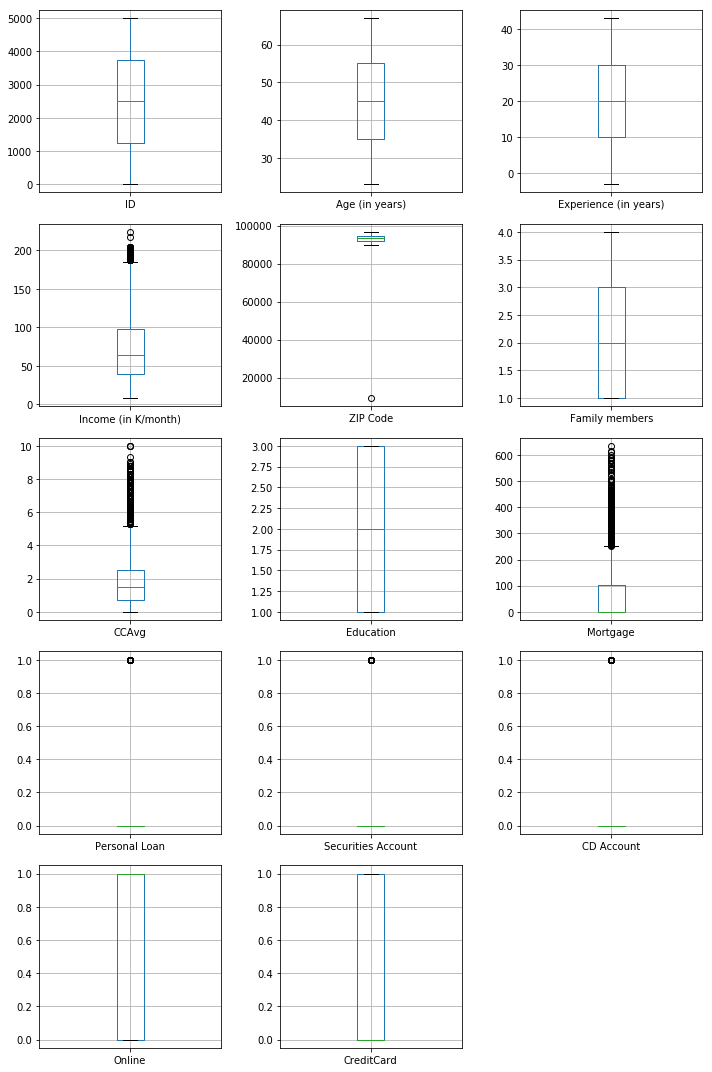

In [9]:
fig, axes = plt.subplots(5,3,figsize=(10,15)) # create figure and axes

for i,el in enumerate(list(loan_df.columns.values)[:]):
    a = loan_df.boxplot(el, ax=axes.flatten()[i])
    
fig.delaxes(axes[4,2])
plt.tight_layout() 
plt.show()

In [10]:
#Lets analysze the distribution
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age (in years),5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience (in years),5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income (in K/month),5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family members,5000.0,2.392200,1.148148,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
# parwise correlation with dependent variables
loan_df.corr()["Personal Loan"]

ID                      -0.024801
Age (in years)          -0.007726
Experience (in years)   -0.007413
Income (in K/month)      0.502462
ZIP Code                 0.000107
Family members           0.060759
CCAvg                    0.366889
Education                0.136722
Mortgage                 0.142095
Personal Loan            1.000000
Securities Account       0.021954
CD Account               0.316355
Online                   0.006278
CreditCard               0.002802
Name: Personal Loan, dtype: float64

In [12]:
#Zip Code doesn't have any impact on personal Loan so going to drop Zip Code from loan_df
loan_df = loan_df.drop("ZIP Code", axis=1)

In [13]:
loan_df.groupby(["Personal Loan"]).count()

,ID,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


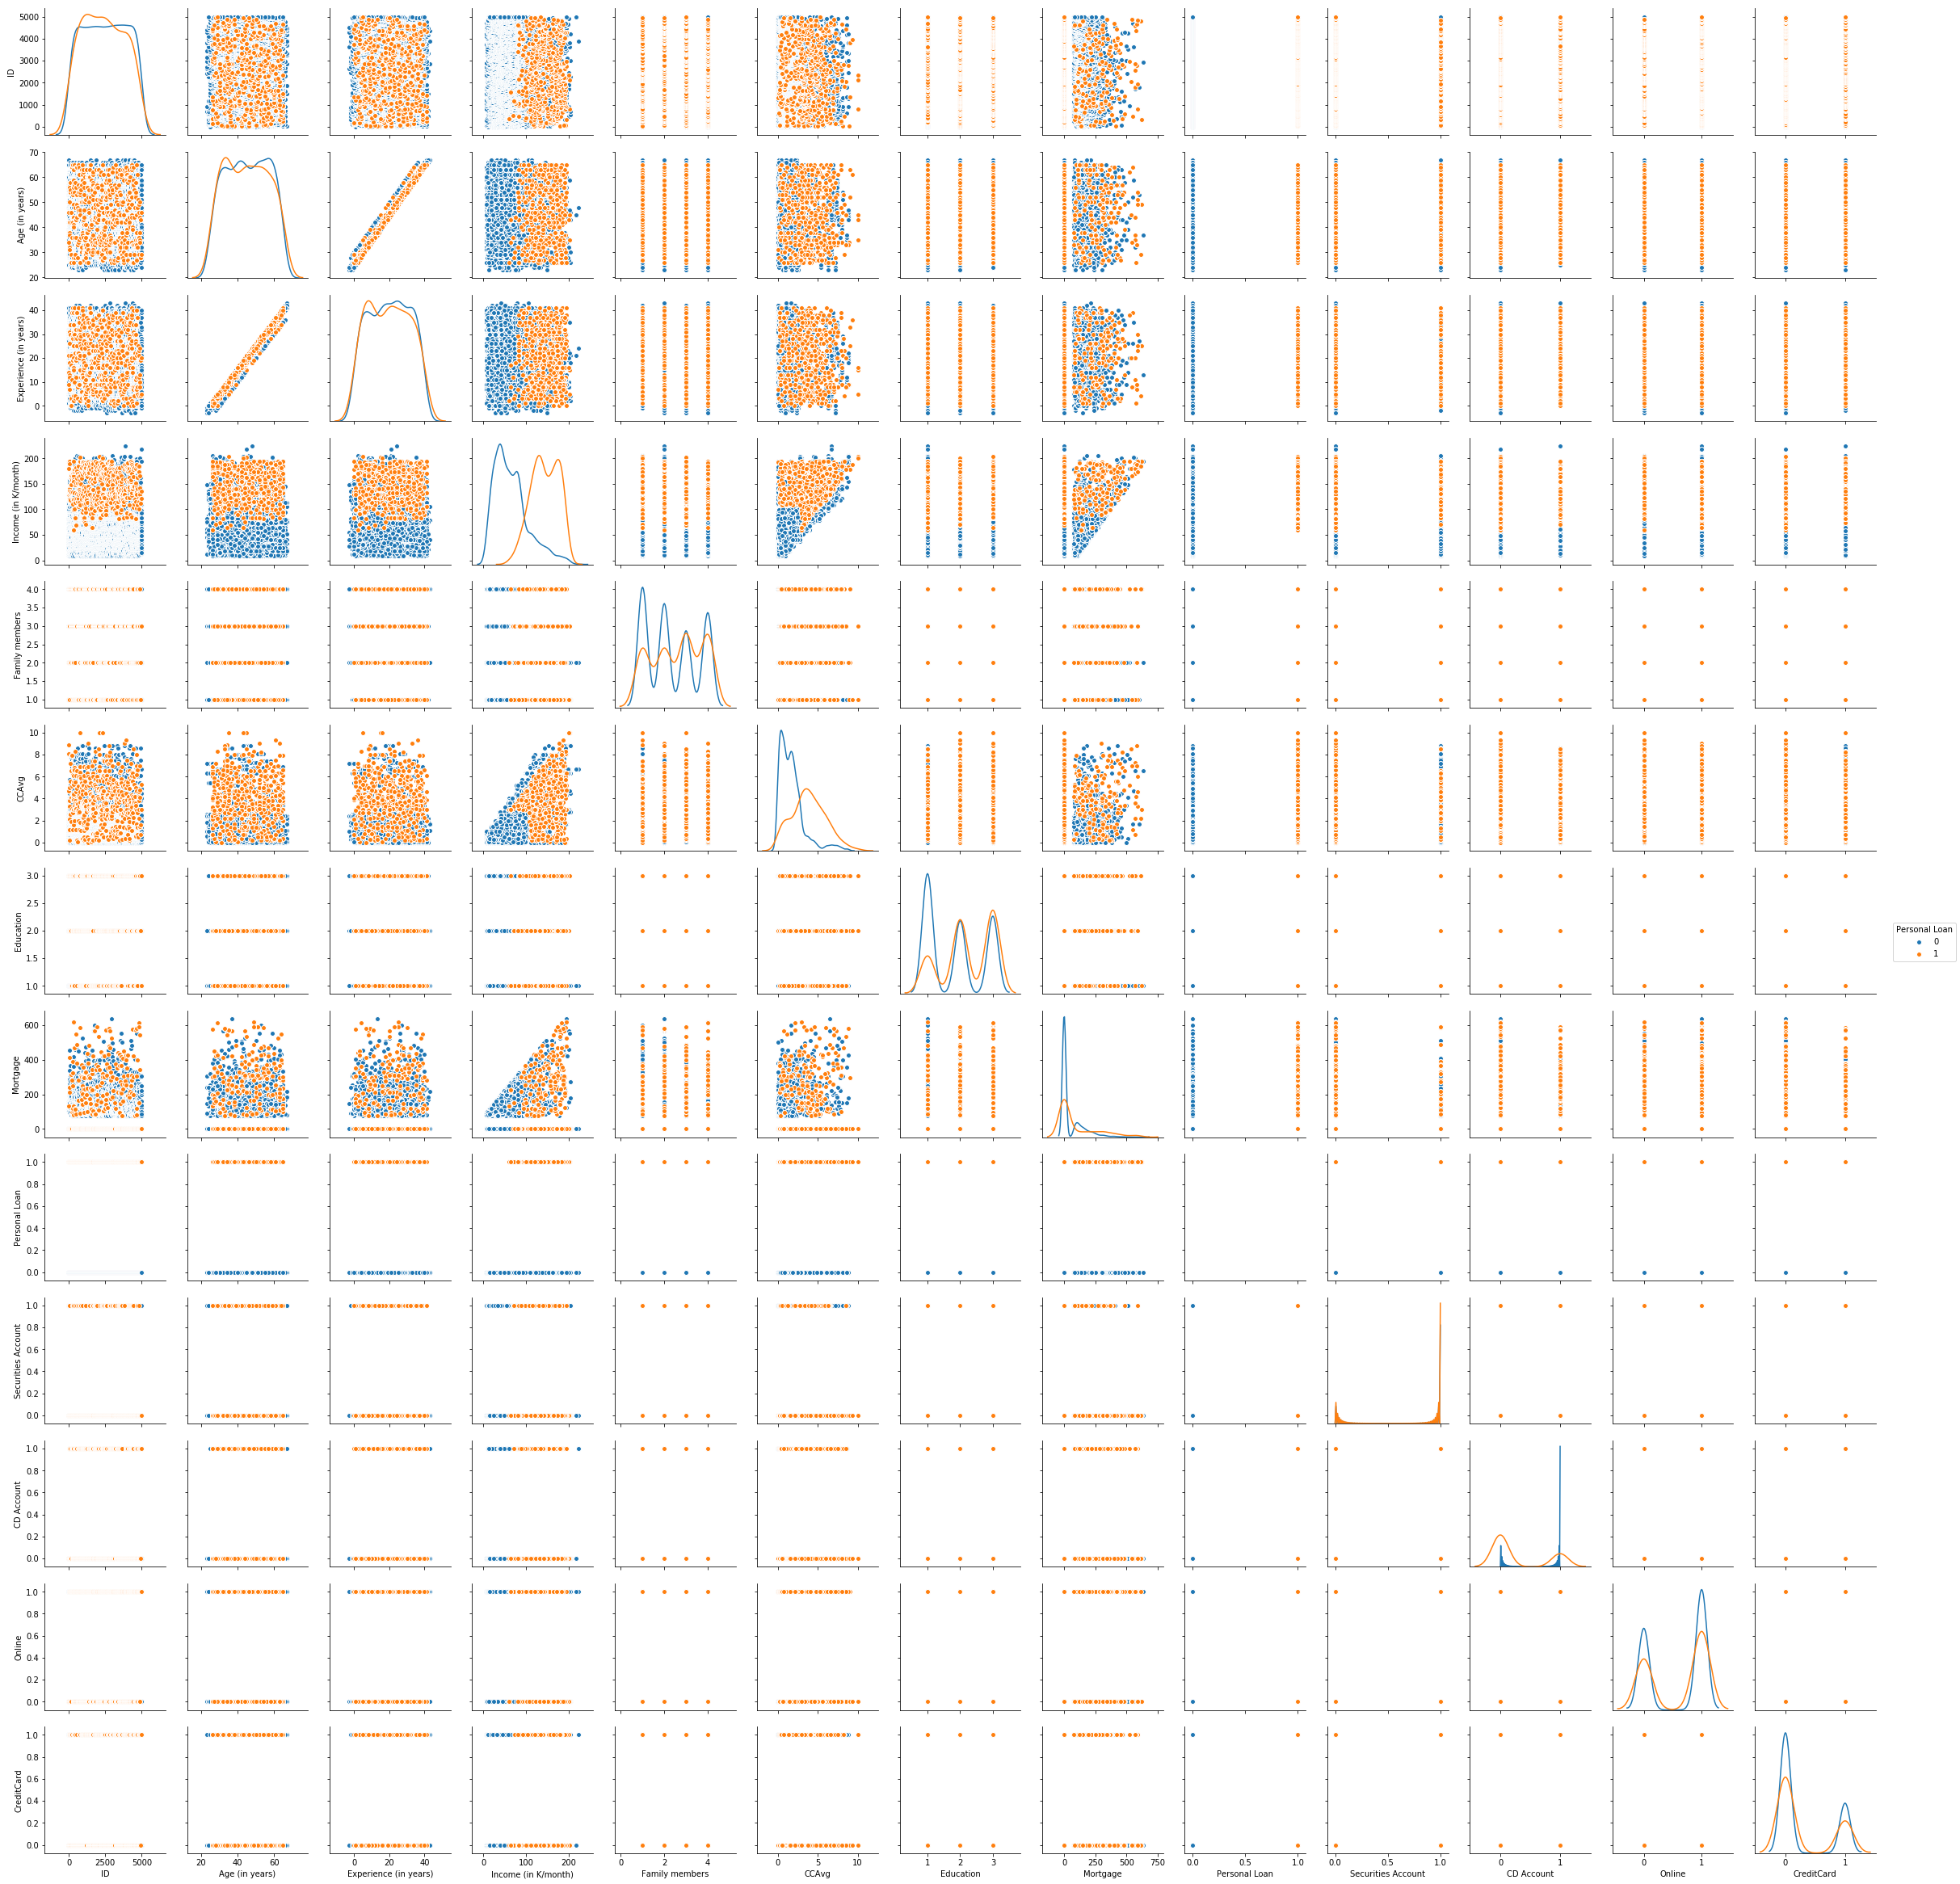

In [14]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
sns.pairplot(loan_df, diag_kind='kde',hue="Personal Loan")  

# 3. Model the data using Logistic regression

In [15]:
# Copying all the predictor variables into X dataframe. Since 'Personal Loan' is dependent variable drop it
X = loan_df.drop(["Personal Loan"], axis=1)
X = X.values
# Copy the 'Personal Loan' column alone into the y dataframe. This is the dependent variable
y = loan_df[["Personal Loan"]]
y = y.values

# Split X and y into training and test set in 70:30 ratio
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

In [16]:
# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# 4. Find the accuracy of the model using confusion matrix

In [17]:
print("Training score ",model.score(X_train, y_train))
print("Test score ",model.score(X_test, y_test))
print("Confusion matrix ", metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

Training score  0.9508571428571428
Test score  0.944
Confusion matrix  [[1334   17]
 [  67   82]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1351
          1       0.83      0.55      0.66       149

avg / total       0.94      0.94      0.94      1500



# 5. Use K - NN model [Hint: Try different values of k] and compare the accuracy of this model with that of Logistic regression

In [18]:
for i in range(1,20,2):
    NNH = KNeighborsClassifier(n_neighbors= i)
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    print("K = ",NNH.n_neighbors,"   Training Score = ",NNH.score(X_train, y_train),"   Testing Score = ",NNH.score(X_test, y_test))

K =  1    Training Score =  1.0    Testing Score =  0.8706666666666667
K =  3    Training Score =  0.9365714285714286    Testing Score =  0.89
K =  5    Training Score =  0.9234285714285714    Testing Score =  0.8906666666666667
K =  7    Training Score =  0.9171428571428571    Testing Score =  0.8986666666666666
K =  9    Training Score =  0.9122857142857143    Testing Score =  0.902
K =  11    Training Score =  0.9097142857142857    Testing Score =  0.9
K =  13    Training Score =  0.9111428571428571    Testing Score =  0.9
K =  15    Training Score =  0.9102857142857143    Testing Score =  0.9026666666666666
K =  17    Training Score =  0.908    Testing Score =  0.9013333333333333
K =  19    Training Score =  0.9062857142857143    Testing Score =  0.9006666666666666


In [19]:
# k=3 is giving the best score
NNH = KNeighborsClassifier(3)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
print("K = ",NNH.n_neighbors,"   Training Score = ",NNH.score(X_train, y_train),"   Testing Score = ",NNH.score(X_test, y_test))

K =  3    Training Score =  0.9365714285714286    Testing Score =  0.89
